In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N_range = 100
T = 10
domain = [0, T]
xx = np.linspace(domain[0], domain[1], N_range)

t = [1.0, 3.0, 4.0, 6.0]
N = len(t)

In [3]:
LW = 4  # Line width
FS = 30  # Font size

def newfigure(figsize):
    fig = plt.figure(figsize=figsize)
    ax = plt.gca()
    
    # Remove axes
    # ax.axis('off')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.spines['bottom'].set_linewidth(LW)
    ax.tick_params(axis=u'both', which=u'both',length=0, pad=15)

    # Labels and ticks
    ax.set_ylim(-0.0, 0.18)
    ax.set_xlim(0.0, 10.0)
    ax.set_xticks(t[:4], [r'$t_1$', r'$t_2$', r'$t_3$', r'$t_4$'], fontsize=FS)

    return ax

### Short Version

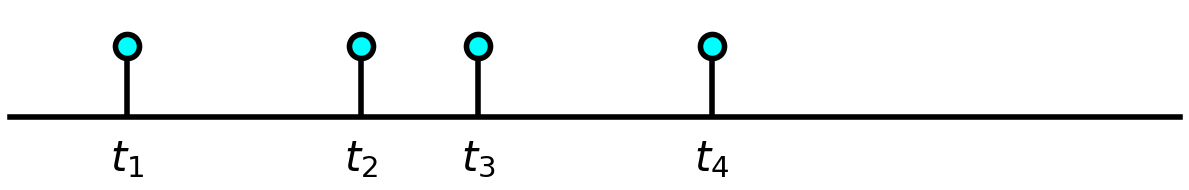

In [4]:
ax = newfigure(figsize=(12, 2))

# Plot PP
plt.vlines(t, 0.0, 0.1, color='black', linewidth=LW,)
# plt.hlines(0.0, 0.0, T, color='black', linewidth=2,)
plt.scatter(t, [0.12] * N, marker='o', edgecolor='black', linewidth=LW, facecolor='cyan', s=300)

plt.tight_layout()
plt.savefig("figures/pp_intro.pdf")

### Long Version

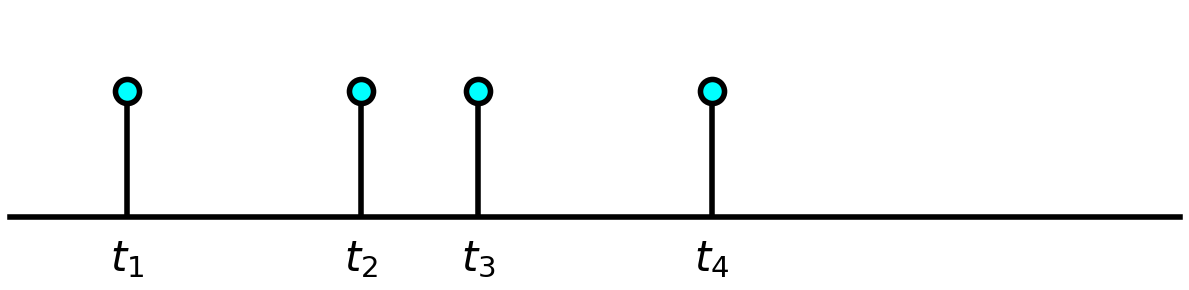

In [5]:
ax = newfigure(figsize=(12, 3))

# Plot PP
plt.vlines(t, 0.0, 0.1, color='black', linewidth=LW,)
# plt.hlines(0.0, 0.0, T, color='black', linewidth=2,)
plt.scatter(t, [0.11] * N, marker='o', edgecolor='black', linewidth=LW, facecolor='cyan', s=300)

plt.tight_layout()
plt.savefig("figures/pp_intro_long.pdf")

### Long Version with Arrows

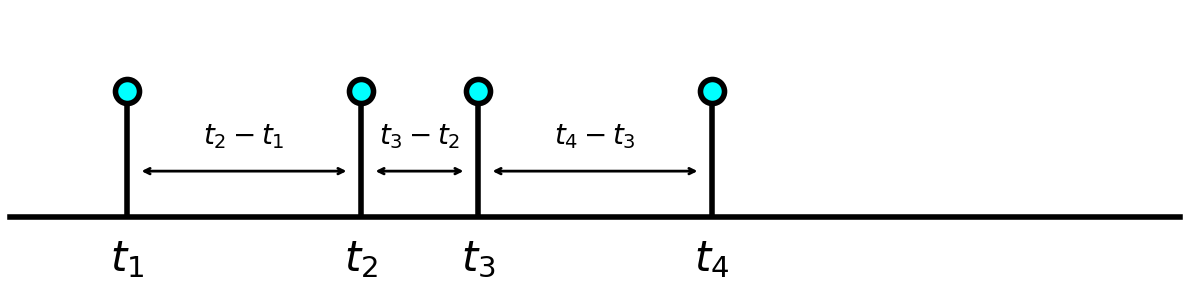

In [6]:
ax = newfigure(figsize=(12, 3))

# Plot PP
plt.vlines(t, 0.0, 0.1, color='black', linewidth=LW,)
# plt.hlines(0.0, 0.0, T, color='black', linewidth=2,)
plt.scatter(t, [0.11] * N, marker='o', edgecolor='black', linewidth=LW, facecolor='cyan', s=300)

# Arrows
for i in range(1, N):
    t0 = t[i-1]
    t1 = t[i]
    plt.annotate('', 
                 xy=(t1-0.1, 0.04), 
                 xytext=(t0+0.1, 0.04), 
                 ha='center',
                 va='center', 
                 arrowprops={
                    'arrowstyle': '<->',
                    'facecolor': 'black', 
                    'lw':2, 
                 },
                )
    label = f'$t_{i+1} - t_{i}$'
    plt.annotate(label, 
                xy=(t1-0.1, 0.05), 
                xytext=(t0 + (t1 - t0) / 2, 0.07), 
                ha='center', 
                va='center',
                fontsize=20,
                arrowprops={
                    'arrowstyle': '<->',
                    'facecolor': 'black', 
                    'lw':0.0, 
                },
    )

plt.tight_layout()
plt.savefig("figures/pp_intro_long_arrows.pdf")

### Latent-State PP

In [7]:
def plot_gp(X, mean_f, var_f):
    plt.plot(X, mean_f, linewidth=LW, color='red', alpha=0.5, linestyle='--')
    plt.fill_between(
        X[:, 0],
        mean_f[:, 0] - 1.0 * np.sqrt(var_f[:, 0]),
        mean_f[:, 0] + 1.0 * np.sqrt(var_f[:, 0]),
        color="red",
        alpha=0.2,
    )


2023-09-29 17:26:33.544151: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-29 17:26:33.684829: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-29 17:26:33.689099: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-29 17:26:33.689115: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

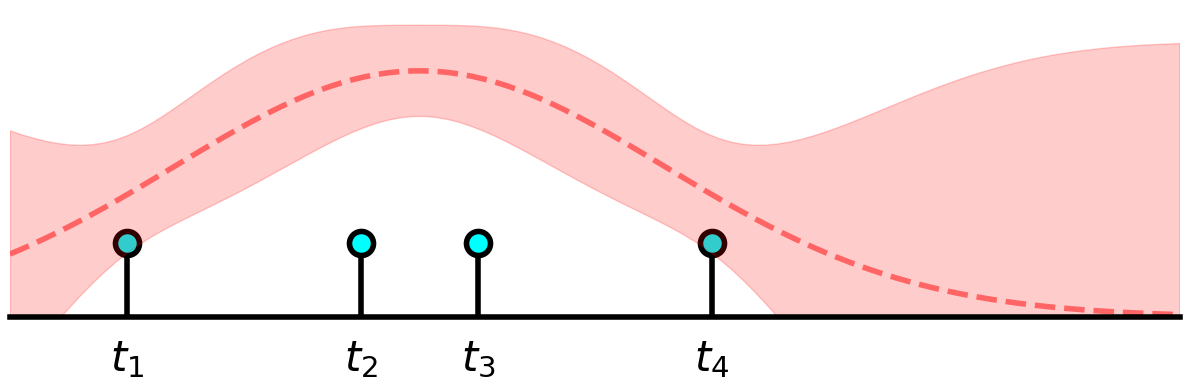

In [8]:
import gpflow
X = np.array([1.0, 3.0, 4.0, 6.0]).reshape(-1, 1)
Y = np.array([0.2, 0.4, 0.4, 0.2]).reshape(-1, 1)
kernel = gpflow.kernels.SquaredExponential(variance=0.2, lengthscales=2.0)
model = gpflow.models.GPR(data=(X, Y), kernel=kernel, noise_variance=0.01)
X_test = np.linspace(0.0, 10.0, 100).reshape(-1, 1)
Y_test = model.predict_y(X_test)
mean_f, var_f = model.predict_f(X_test)

ax = newfigure(figsize=(12, 4))

# Plot PP
plt.vlines(t, 0.0, 0.1, color='black', linewidth=LW,)
# plt.hlines(0.0, 0.0, T, color='black', linewidth=2,)
plt.scatter(t, [0.12] * N, marker='o', edgecolor='black', linewidth=LW, facecolor='cyan', s=300)

plt.ylim(-0.0, 0.5)

plot_gp(X_test, mean_f, var_f)

plt.tight_layout()
plt.savefig("figures/latent_state_pp.pdf")

### Regressive PP

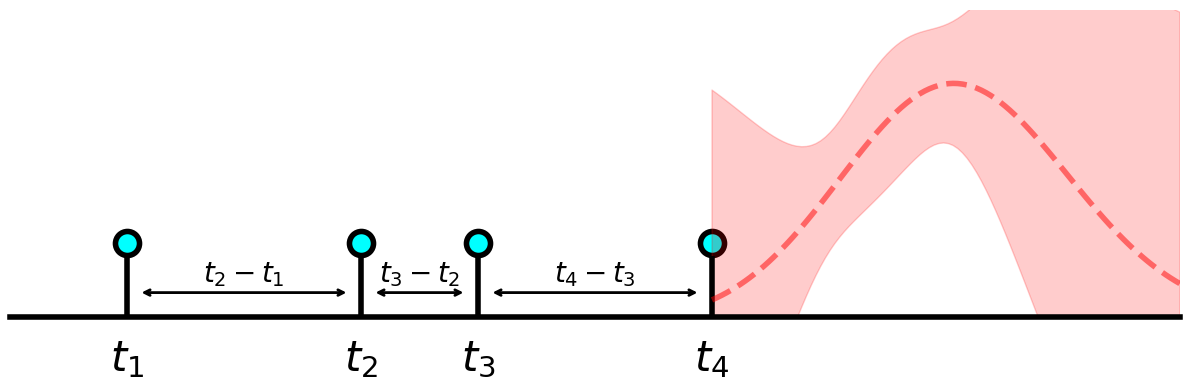

In [9]:
X = np.array([1.0, 2.0]).reshape(-1, 1)
Y = np.array([0.2, 0.4]).reshape(-1, 1)
kernel = gpflow.kernels.SquaredExponential(variance=0.2, lengthscales=1.0)
model = gpflow.models.GPR(data=(X, Y), kernel=kernel, noise_variance=0.01)
X_test = np.linspace(0.0, 4.0, 100).reshape(-1, 1)
Y_test = model.predict_y(X_test)
mean_f, var_f = model.predict_f(X_test)


ax = newfigure(figsize=(12, 4))

# Plot PP
plt.vlines(t, 0.0, 0.1, color='black', linewidth=LW,)
# plt.hlines(0.0, 0.0, T, color='black', linewidth=2,)
plt.scatter(t, [0.12] * N, marker='o', edgecolor='black', linewidth=LW, facecolor='cyan', s=300)

# Labels and ticks
plt.ylim(-0.0, 0.5)

# Arrows
for i in range(1, N):
    t0 = t[i-1]
    t1 = t[i]
    plt.annotate('', 
                 xy=(t1-0.1, 0.04), 
                 xytext=(t0+0.1, 0.04), 
                 ha='center',
                 va='center', 
                 arrowprops={
                    'arrowstyle': '<->',
                    'facecolor': 'black', 
                    'lw':2, 
                 },
                )
    label = f'$t_{i+1} - t_{i}$'
    plt.annotate(label, 
                xy=(t1-0.1, 0.05), 
                xytext=(t0 + (t1 - t0) / 2, 0.07), 
                ha='center', 
                va='center',
                fontsize=20,
                arrowprops={
                    'arrowstyle': '<->',
                    'facecolor': 'black', 
                    'lw':0.0, 
                },
    )

plot_gp(X_test + 6.0, mean_f, var_f)

plt.tight_layout()
plt.savefig("figures/regressive_pp.pdf")

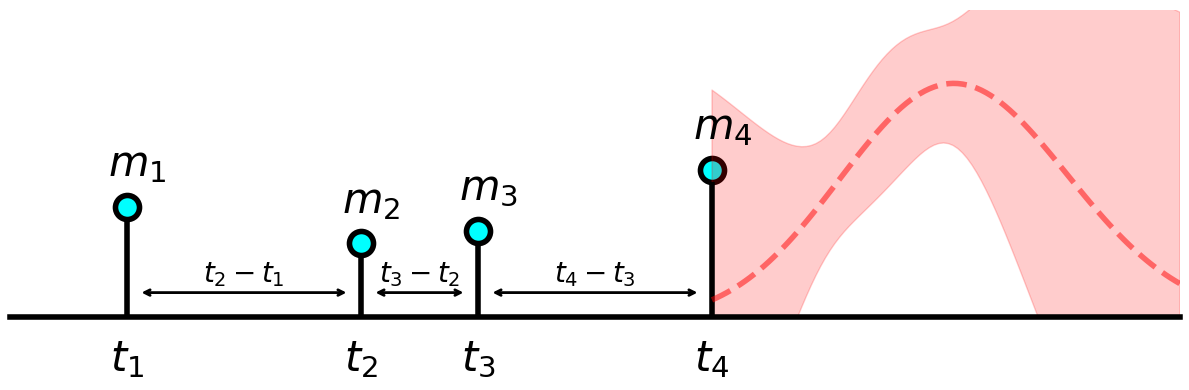

In [10]:
X = np.array([1.0, 2.0]).reshape(-1, 1)
Y = np.array([0.2, 0.4]).reshape(-1, 1)
kernel = gpflow.kernels.SquaredExponential(variance=0.2, lengthscales=1.0)
model = gpflow.models.GPR(data=(X, Y), kernel=kernel, noise_variance=0.01)
X_test = np.linspace(0.0, 4.0, 100).reshape(-1, 1)
Y_test = model.predict_y(X_test)
mean_f, var_f = model.predict_f(X_test)
marks = np.array([0.18, 0.12, 0.14, 0.24])

ax = newfigure(figsize=(12, 4))

# Plot PP
plt.vlines(t, [0.0] * len(marks), marks-0.02, color='black', linewidth=LW,)
# plt.hlines(0.0, 0.0, T, color='black', linewidth=2,)
plt.scatter(t, marks, marker='o', edgecolor='black', linewidth=LW, facecolor='cyan', s=300)

# Labels and ticks
plt.ylim(-0.0, 0.5)
m_text = [r'$m_1$', r'$m_2$', r'$m_3$', r'$m_4$']

# Arrows
for i in range(1, N):
    t0 = t[i-1]
    t1 = t[i]
    plt.annotate('', 
                 xy=(t1-0.1, 0.04), 
                 xytext=(t0+0.1, 0.04), 
                 ha='center',
                 va='center', 
                 arrowprops={
                    'arrowstyle': '<->',
                    'facecolor': 'black', 
                    'lw':2, 
                 },
                )
    label = f'$t_{i+1} - t_{i}$'
    plt.annotate(label, 
                xy=(t1-0.1, 0.05), 
                xytext=(t0 + (t1 - t0) / 2, 0.07), 
                ha='center', 
                va='center',
                fontsize=20,
                arrowprops={
                    'arrowstyle': '<->',
                    'facecolor': 'black', 
                    'lw':0.0, 
                },
    )
for mti, ti, mi in zip(m_text, t, marks):
    plt.annotate(mti, xy=(ti-0.16, mi+0.05), fontsize=FS)
    
plt.plot(X_test + 6.0, mean_f, linewidth=LW, color='red', alpha=0.5, linestyle='--')
plt.fill_between(
    X_test[:, 0] + 6.0,
    mean_f[:, 0] - 1.0 * np.sqrt(var_f[:, 0]),
    mean_f[:, 0] + 1.0 * np.sqrt(var_f[:, 0]),
    color="red",
    alpha=0.2,
)
plt.tight_layout()
plt.savefig("figures/regressive_mpp.pdf")